In [1]:
from maxent_disaggregation import maxent_disagg
from maxent_disaggregation import plot_samples_hist
import numpy as np

In [2]:
mean_aggregate = 10
sd_aggregate = 0.5
min_aggregate = 0
max_aggregate = np.inf
shares_disaggregates = [0.4, 0.25, 0.2, 0.15]
sds_shares = [0.1, np.nan, 0.04, 0.001]



In [3]:
samples, _ = maxent_disagg(n=10000, 
                        mean_0=mean_aggregate,
                        sd_0=sd_aggregate,
                        min_0=min_aggregate,
                        max_0=max_aggregate, 
                        shares=shares_disaggregates, 
                        sds=sds_shares, 
                        )

Sds above threshold: [ 0.69602296  1.30144588 65.82646659],             sds: [0.1   0.04  0.001], sample_sd: [0.1696023  0.09205784 0.06682647],             indices: [0 2 3]


/Users/ajakobs/Documents/code_projects/maxent_disaggregation/maxent_disaggregation/shares.py:188: RuntimeWarning: divide by zero encountered in scalar divide
  remaining_share = (
/Users/ajakobs/Documents/code_projects/maxent_disaggregation/maxent_disaggregation/shares.py:237: UserWarning: The generated samples for the shares have a standard deviation that is more than 20.0% different from the specified sd's. Please note that the specified sd's might be incompetibale with the other constraints. Please check your inputs. To surpress this warning you can set a higher threshold_sd.
  warnings.warn(


In [159]:
samples, agg, shares_, gamma = maxent_disagg(n=10000, mean_0=mean, sd_0=sd, shares=shares, sds=sds,
                                             log=True, grad_based=True, return_shares=True, 
                                             return_aggregate=True, threshold_shares=0.1, 
                                             min_0=min_0, max_0=max_0)
print("#######")
print(gamma)
print(shares_.mean(axis=0), shares_.std(axis=0))

NameError: name 'mean' is not defined

In [160]:
samples.min(axis=0), samples.max(axis=0), samples.mean(axis=0), samples.std(axis=0)

(array([1.12882072e-04, 1.31756990e-16, 4.47583718e-05, 3.36997694e-05]),
 array([ 8.3274032 , 11.41803713,  4.62015065,  3.4207201 ]),
 array([3.93788771, 2.50902805, 2.02318643, 1.52738056]),
 array([1.72186013, 3.07618055, 0.93930912, 0.67450033]))

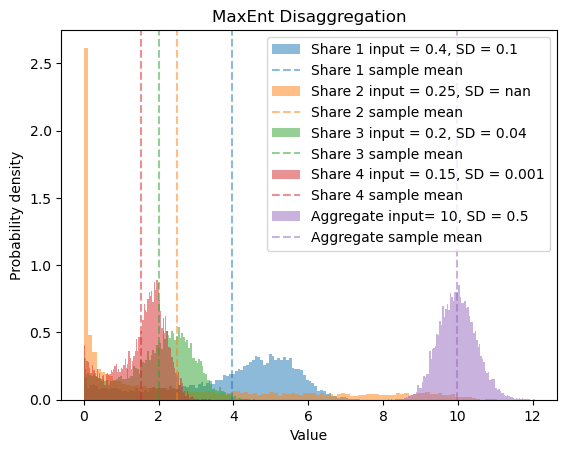

In [ ]:
plot_samples_hist(samples, 
                  mean_0=mean_aggregate, 
                  sd_0=sd_aggregate, 
                  shares=shares_disaggregates, 
                  sds=sds_shares)

In [129]:
samples.min(axis=0), samples.max(axis=0), samples.mean(axis=0), samples.std(axis=0)

(array([1.33880745, 0.99134589, 0.72306108, 0.60408139]),
 array([7.46342139, 4.69501032, 4.47955106, 2.76262412]),
 array([3.93883096, 2.52717489, 2.00729331, 1.51645786]),
 array([0.85245982, 0.46584637, 0.48214767, 0.27872952]))

## test different dirichlet functions for small shares


In [8]:
np.asarray(shares)*mean

array([4.  , 3.  , 1.  , 0.05, 1.95])

In [9]:
from scipy.stats import gamma, dirichlet

In [10]:
def dir_gamma(n, shares, gamma_par, threshold=1e-2):
    alpha = gamma_par * shares
    l = len(alpha)
    rate = np.ones(l)
    rate[alpha < threshold] = 1 / alpha[alpha < threshold]
    alpha[alpha < threshold] = 1
    x = gamma.rvs(alpha, scale=1 / rate, size=(n, l))
    sample = x / x.sum(axis=1, keepdims=True)
    return sample

In [32]:
def accurate_dirichlet_rvs(alpha, size=(), random_state=None):

    # scaffolding
    random_state = np.random.default_rng(random_state)
    alpha = np.asarray(alpha)
    assert alpha.ndim >= 1
    size = np.broadcast_shapes(alpha.shape[:-1], size)
    alpha = np.broadcast_to(alpha, size + alpha.shape[-1:])

    # actual computation
    lny = stats.loggamma.rvs(alpha, random_state=rng)
        # scipy's loggamma is the distribution of the logarithm of a gamma var
    norm = special.logsumexp(lny, axis=-1, keepdims=True)
    return np.exp(lny - norm)

In [ ]:
n=10000
shares_test = np.array([0.5, 0.495, 0.001, 0.004])
gamma_par = 1

In [12]:
%%time
test_samples = dir_gamma(n, shares_test, gamma_par)

CPU times: user 1.14 ms, sys: 592 μs, total: 1.73 ms
Wall time: 944 μs


In [13]:
%%time
test_samples2 = dirichlet.rvs(shares_test*gamma_par, size=n)

CPU times: user 965 μs, sys: 516 μs, total: 1.48 ms
Wall time: 827 μs


In [14]:
%%time
test_samples3 = np.random.dirichlet(shares_test*gamma_par, size=n)

CPU times: user 1.58 ms, sys: 1.54 ms, total: 3.11 ms
Wall time: 2.57 ms


In [33]:
%%time 
test_samples4 = accurate_dirichlet_rvs(shares_test*gamma_par, size=n)

CPU times: user 4.79 ms, sys: 1.66 ms, total: 6.45 ms
Wall time: 5.03 ms


In [34]:
test_samples.mean(axis=0), test_samples.std(axis=0), test_samples2.mean(axis=0), test_samples2.std(axis=0), test_samples3.mean(axis=0), test_samples3.std(axis=0), test_samples4.mean(axis=0), test_samples4.std(axis=0)

(array([0.50273982, 0.48762009, 0.00196163, 0.00767846]),
 array([0.28643831, 0.28636003, 0.00543279, 0.01697934]),
 array([0.50273918, 0.49182625, 0.00101013, 0.00442445]),
 array([0.28596424, 0.28575128, 0.01961798, 0.03966666]),
 array([0.49726875, 0.49707717, 0.00114251, 0.00451157]),
 array([0.28966917, 0.29004174, 0.02183515, 0.04029201]),
 array([0.50033119, 0.49486214, 0.00107675, 0.00372993]),
 array([0.28821865, 0.28835476, 0.02055974, 0.03442308]))

In [16]:
test_samples.mean(axis=0)/test_samples2.mean(axis=0), test_samples.std(axis=0)/test_samples2.std(axis=0)

(array([1.00000128, 0.99144787, 1.94196578, 1.73546154]),
 array([1.00165779, 1.00213033, 0.27692938, 0.42805082]))

In [35]:
test_samples.mean(axis=0)/shares_test, test_samples2.mean(axis=0)/shares_test, test_samples3.mean(axis=0)/shares_test, test_samples4.mean(axis=0)/shares_test

(array([1.00547965, 0.98509108, 1.96163016, 1.91961482]),
 array([1.00547836, 0.99358838, 1.01012602, 1.10611199]),
 array([0.99453751, 1.0041963 , 1.14250841, 1.12789271]),
 array([1.00066237, 0.9997215 , 1.0767468 , 0.93248149]))

In [36]:
test_samples.min(axis=0), test_samples.max(axis=0), test_samples2.min(axis=0), test_samples2.max(axis=0), test_samples3.min(axis=0), test_samples3.max(axis=0), test_samples4.min(axis=0), test_samples4.max(axis=0)

(array([4.55906754e-05, 5.35417414e-05, 9.92365978e-08, 5.99430304e-07]),
 array([0.99881418, 0.9990057 , 0.36785358, 0.5597355 ]),
 array([6.08896327e-05, 5.12948434e-05, 0.00000000e+00, 0.00000000e+00]),
 array([0.9999487 , 0.99993911, 0.93781111, 0.91456545]),
 array([1.06056104e-04, 2.39616004e-05, 0.00000000e+00, 0.00000000e+00]),
 array([0.99995533, 0.99985581, 0.80406567, 0.87291822]),
 array([0.00017605, 0.00022497, 0.        , 0.        ]),
 array([0.99977503, 0.99960299, 0.95107309, 0.90482355]))

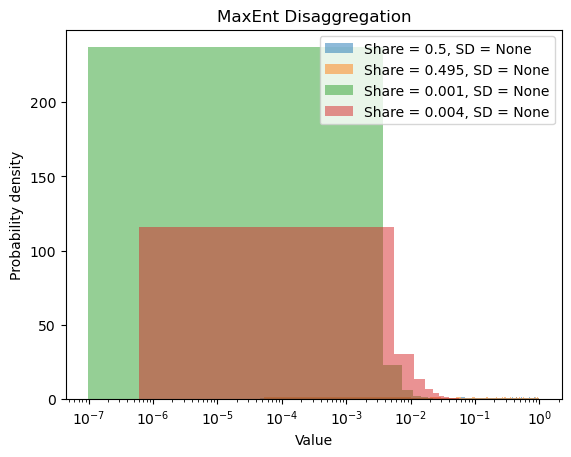

In [19]:
plot_samples_hist(test_samples, shares=shares_test, logscale=True)

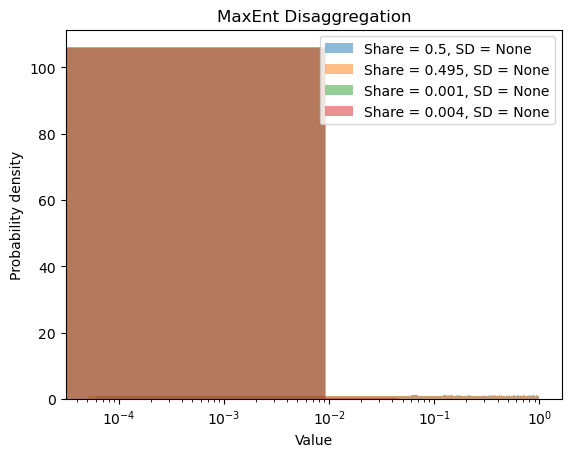

In [20]:
plot_samples_hist(test_samples2, shares=shares_test, logscale=True)

In [21]:
# calculate summary statistics for each component
def calculate_summary_statistics(samples):
    means = np.mean(samples, axis=0)
    sds = np.std(samples, axis=0)
    quantiles = np.quantile(samples, [0.025, 0.25, 0.5, 0.75, 0.975], axis=0)
    min = np.min(samples, axis=0)
    max = np.max(samples, axis=0)
    return means, sds, quantiles, min, max 


In [22]:
# Calculate summary statistics
means, sds, quantiles, min, max = calculate_summary_statistics(test_samples)
print("Summary Statistics:")
print("Means:", means)
print("Standard Deviations:", sds)  
print("Percentiles (2.5,25,50,75,97.5):", quantiles)
print("Minimum:", min)
print("Maximum:", max)
print("Coefficient of variation:"), print(sds / means)

Summary Statistics:
Means: [0.50273982 0.48762009 0.00196163 0.00767846]
Standard Deviations: [0.28643831 0.28636003 0.00543279 0.01697934]
Percentiles (2.5,25,50,75,97.5): [[2.46522828e-02 2.45476063e-02 2.63914652e-05 1.13092963e-04]
 [2.56358937e-01 2.39468968e-01 3.23109458e-04 1.24361662e-03]
 [5.02972161e-01 4.88243464e-01 8.35358210e-04 3.38699784e-03]
 [7.49248045e-01 7.32819800e-01 2.03273095e-03 8.22997085e-03]
 [9.68034888e-01 9.65472325e-01 1.02808937e-02 3.93382934e-02]]
Minimum: [4.55906754e-05 5.35417414e-05 9.92365978e-08 5.99430304e-07]
Maximum: [0.99881418 0.9990057  0.36785358 0.5597355 ]
Coefficient of variation:
[0.56975456 0.58726052 2.76953015 2.21129577]


(None, None)

In [23]:
# Calculate summary statistics
means, sds, quantiles, min, max = calculate_summary_statistics(test_samples2)
print("Summary Statistics:")
print("Means:", means)
print("Standard Deviations:", sds)  
print("Percentiles (2.5,25,50,75,97.5):", quantiles)
print("Minimum:", min)
print("Maximum:", max)
print("Coefficient of variation:"), print(sds / means)

Summary Statistics:
Means: [0.50273918 0.49182625 0.00101013 0.00442445]
Standard Deviations: [0.28596424 0.28575128 0.01961798 0.03966666]
Percentiles (2.5,25,50,75,97.5): [[2.73139229e-002 2.49023353e-002 0.00000000e+000 3.81223641e-195]
 [2.55021304e-001 2.44354348e-001 8.43143768e-311 1.06533730e-076]
 [5.04120468e-001 4.88631846e-001 6.60087145e-154 5.21334663e-039]
 [7.49539297e-001 7.37352276e-001 2.59052770e-064 1.34753943e-016]
 [9.73485572e-001 9.70788955e-001 1.03479651e-006 1.90377977e-002]]
Minimum: [6.08896327e-05 5.12948434e-05 0.00000000e+00 0.00000000e+00]
Maximum: [0.9999487  0.99993911 0.93781111 0.91456545]
Coefficient of variation:
[ 0.56881233  0.58100048 19.4213149   8.96533454]


(None, None)

In [38]:
# Calculate summary statistics
means, sds, quantiles, min, max = calculate_summary_statistics(test_samples4)
print("Summary Statistics:")
print("Means:", means)
print("Standard Deviations:", sds)  
print("Percentiles (2.5,25,50,75,97.5):", quantiles)
print("Minimum:", min)
print("Maximum:", max)
print("Coefficient of variation:"), print(sds / means)

Summary Statistics:
Means: [0.50033119 0.49486214 0.00107675 0.00372993]
Standard Deviations: [0.28821865 0.28835476 0.02055974 0.03442308]
Percentiles (2.5,25,50,75,97.5): [[2.48164288e-002 2.39904793e-002 0.00000000e+000 2.93540582e-201]
 [2.51325704e-001 2.42688858e-001 8.90712132e-308 7.09216546e-076]
 [5.02708716e-001 4.90615615e-001 1.02014931e-153 1.54499209e-038]
 [7.51912265e-001 7.43733322e-001 1.25302303e-065 6.92043165e-017]
 [9.75474628e-001 9.73307148e-001 3.87818004e-007 1.28156448e-002]]
Minimum: [0.00017605 0.00022497 0.         0.        ]
Maximum: [0.99977503 0.99960299 0.95107309 0.90482355]
Coefficient of variation:
[ 0.57605573  0.58269715 19.09431274  9.22889015]


(None, None)

In [25]:
shares_test

array([0.5  , 0.495, 0.001, 0.004])

In [26]:
test_samples2.min(axis=0), test_samples2.max(axis=0)

(array([6.08896327e-05, 5.12948434e-05, 0.00000000e+00, 0.00000000e+00]),
 array([0.9999487 , 0.99993911, 0.93781111, 0.91456545]))

In [27]:
test_samples.min(axis=0), test_samples.max(axis=0)

(array([4.55906754e-05, 5.35417414e-05, 9.92365978e-08, 5.99430304e-07]),
 array([0.99881418, 0.9990057 , 0.36785358, 0.5597355 ]))

In [28]:
(test_samples2 == test_samples2.min(axis=0)).sum(axis=0)

array([   1,    1, 2364,   29])

In [37]:
(test_samples4 == test_samples4.min(axis=0)).sum(axis=0)

array([   1,    1, 2333,   20])

In [31]:
dirichlet

factor:  1.0


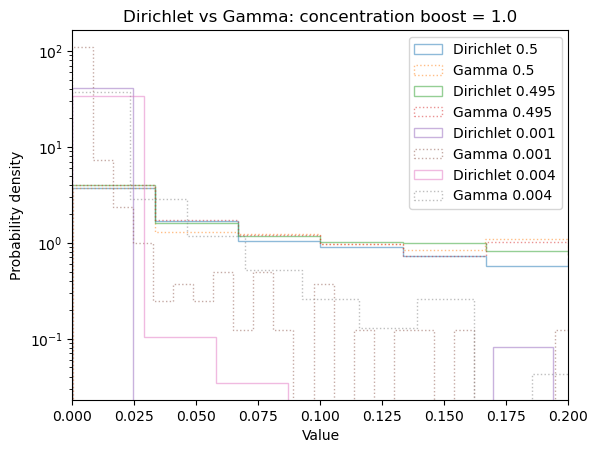

dirichlet:  [1.02009797 0.974875   2.14043584 1.31186267] nr of zeros:  [  0   0 452  48]
gamma dirichlet:  [0.96328753 1.00541628 4.54345183 4.03293117] [0 0 0 0]
factor:  1.9


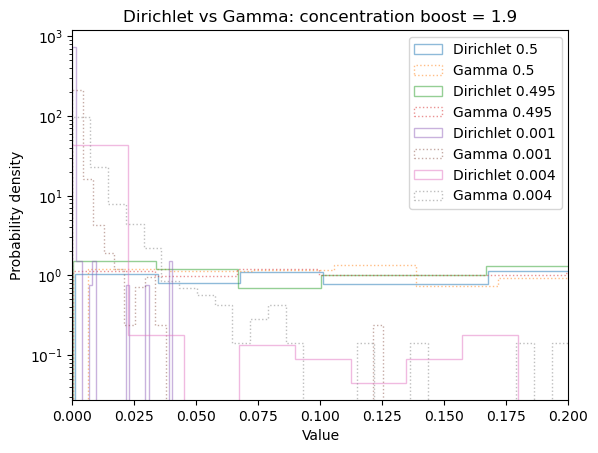

dirichlet:  [1.02447476 0.97529399 0.16760484 1.20612202] nr of zeros:  [  0   0 258   2]
gamma dirichlet:  [0.98430254 1.00650392 1.89600804 1.93331997] [0 0 0 0]
factor:  2.8


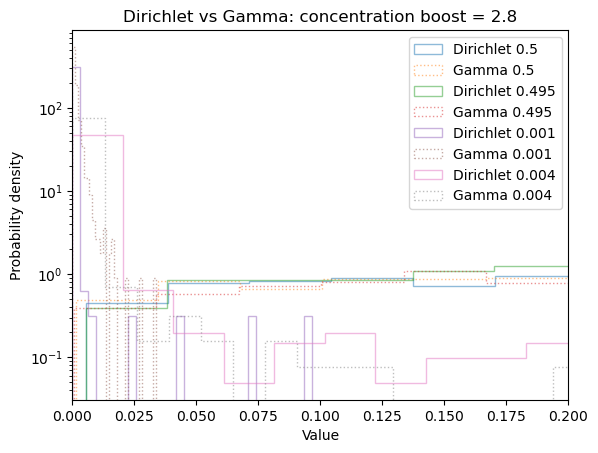

dirichlet:  [1.02133759 0.9788284  0.2686593  1.13562111] nr of zeros:  [  0   0 108   0]
gamma dirichlet:  [0.98294484 1.01784946 1.56956336 0.78063328] [0 0 0 2]
factor:  3.7


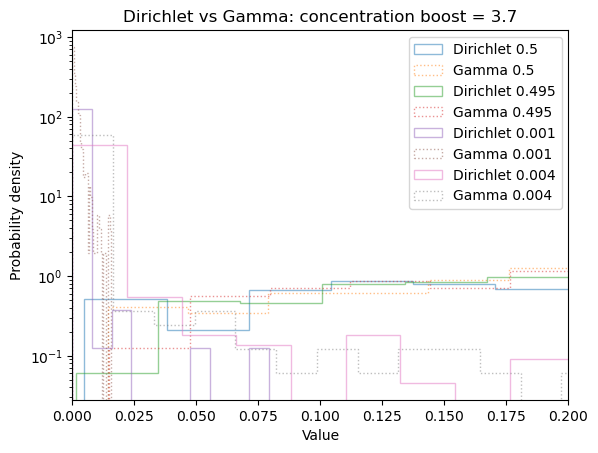

dirichlet:  [0.99160293 1.00901752 0.47126872 1.0658985 ] nr of zeros:  [ 0  0 57  0]
gamma dirichlet:  [1.00284887 0.99529363 1.4655802  1.1099087 ] [0 0 0 0]
factor:  4.6


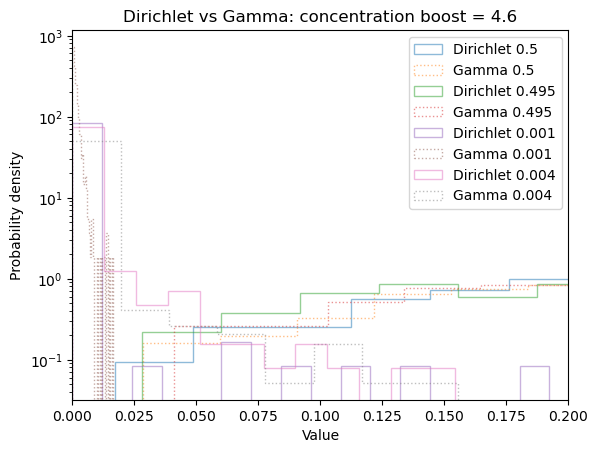

dirichlet:  [1.01918843 0.98314178 1.11998847 0.65765367] nr of zeros:  [ 0  0 23  0]
gamma dirichlet:  [0.98343697 1.01609074 1.25470207 1.01547382] [0 0 0 0]
factor:  5.5


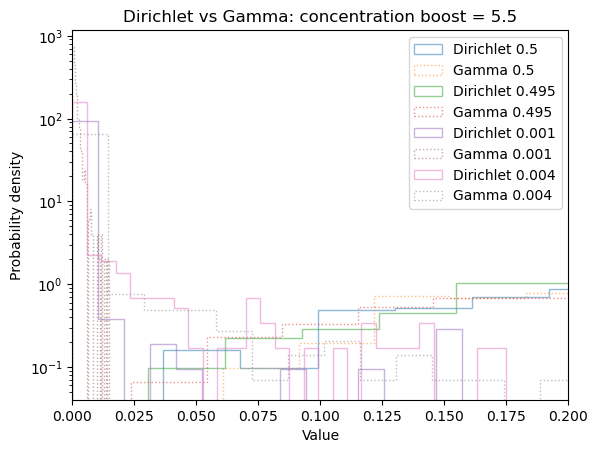

dirichlet:  [1.0297954  0.97097233 1.24549246 0.80637676] nr of zeros:  [ 0  0 18  0]
gamma dirichlet:  [1.01419687 0.9872173  1.22773686 0.75031668] [0 0 0 0]
factor:  6.4


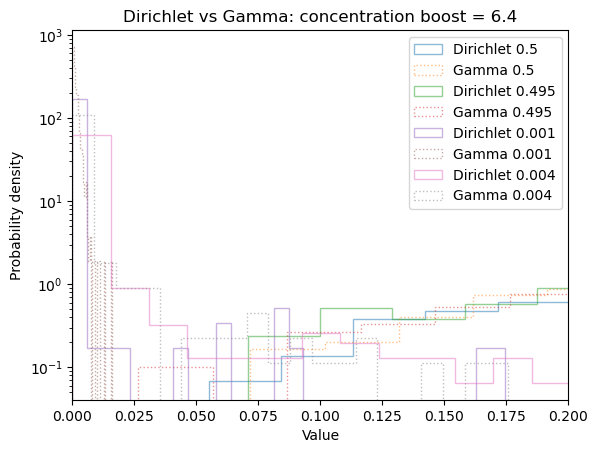

dirichlet:  [1.01085196 0.98637228 0.91946984 1.3500678 ] nr of zeros:  [0 0 9 0]
gamma dirichlet:  [1.00284667 0.99565829 1.15190418 1.14347677] [0 0 0 0]
factor:  7.3


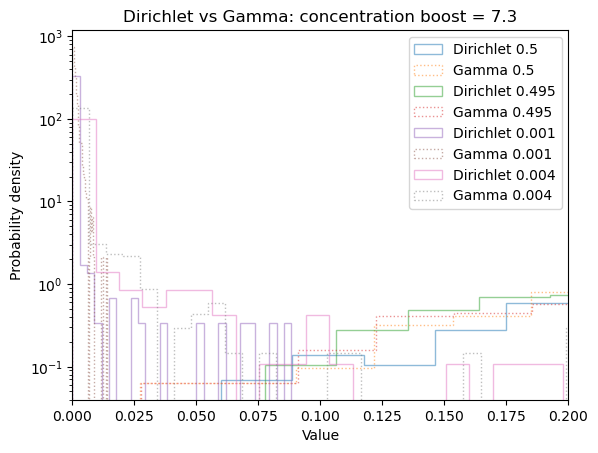

dirichlet:  [1.01509311 0.98659371 0.65057327 0.85974658] nr of zeros:  [0 0 2 0]
gamma dirichlet:  [1.00748752 0.99436145 1.11736873 0.73248783] [0 0 0 0]
factor:  8.2


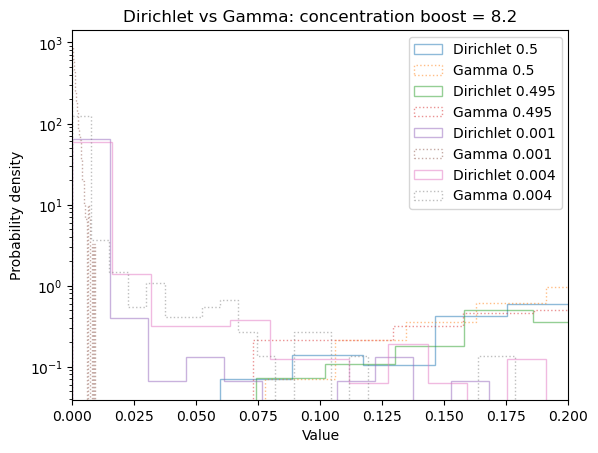

dirichlet:  [1.00368882 0.99437468 1.37507139 1.14126361] nr of zeros:  [0 0 5 0]
gamma dirichlet:  [0.99412756 1.0043003  1.15247109 1.16377446] [0 0 0 0]
factor:  9.1


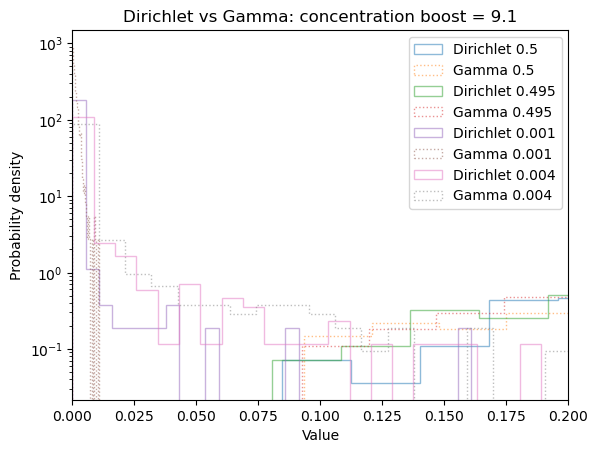

dirichlet:  [1.00792795 0.99401842 0.60252289 0.84859608] nr of zeros:  [0 0 3 0]
gamma dirichlet:  [1.00336773 0.99701209 1.07947645 0.92891791] [0 0 0 0]
factor:  10.0


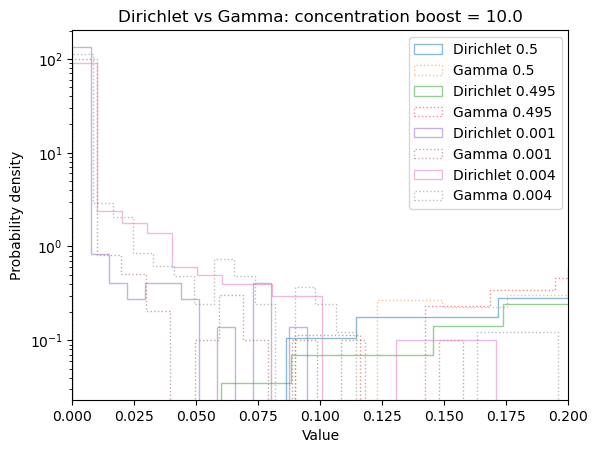

dirichlet:  [1.0019591 0.9963762 1.1433064 1.1677313] nr of zeros:  [0 0 0 0]
gamma dirichlet:  [1.01233354 0.98568178 1.7218331  1.04972961] [0 0 1 0]


In [32]:
for x in np.linspace(1,10, 11):
    print("factor: ", x)
    dirichlet_test = dirichlet.rvs(shares_check*x, size=1000)
    gamm_test = dir_gamma(1000, shares_check, x)
    for i in range(len(shares_check)):
        value = shares_check[i]
        plt.hist(dirichlet_test[:,i], bins=30, alpha=0.5, histtype='step', label=f'Dirichlet {value}', density=True)
        plt.hist(gamm_test[:,i], bins=30, alpha=0.5, linestyle=':', histtype='step', label=f'Gamma {value}', density=True)
    plt.legend()
    plt.ylabel('Probability density')
    plt.xlabel('Value')
    plt.title('Dirichlet vs Gamma: concentration boost = '+str(x))
    plt.yscale('log')
    plt.xlim(0,0.2)
    plt.show()
    print("dirichlet: ", dirichlet_test.mean(axis=0)/shares_check, "nr of zeros: ", (dirichlet_test == 0).sum(axis=0))
    print("gamma dirichlet: ", dir_gamma(1000, shares_check, x).mean(axis=0)/shares_check, (gamm_test == 0).sum(axis=0))
